# Machine Learning Assignment Part 1
---

### 1. Import Libraries/Dataset 

- Download the dataset.
- Import the required libraries.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



In [2]:

#loading dataset from the From local file
dataset = pd.read_csv("hostel_data_classified.csv")

print(dataset.head()) # check that the data is loaded correctly

   Temperature  Humidity     CO2  Light Intensity  Harmful
0        28.99     80.79    0.00           4263.0        1
1        29.01     80.75  564.07           4279.0        1
2        29.01     80.73  671.08           4279.0        1
3        29.02     80.74  625.94           4287.0        1
4        29.05     80.73  630.03           4294.0        1


### 2. Data Visualization and Exploration
-	Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
-	Provide appropriate data visualizations to get an insight about the dataset. 
-	Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer. Answer without justification will not be awarded marks.



   Temperature  Humidity     CO2  Light Intensity  Harmful
0        28.99     80.79    0.00           4263.0        1
1        29.01     80.75  564.07           4279.0        1


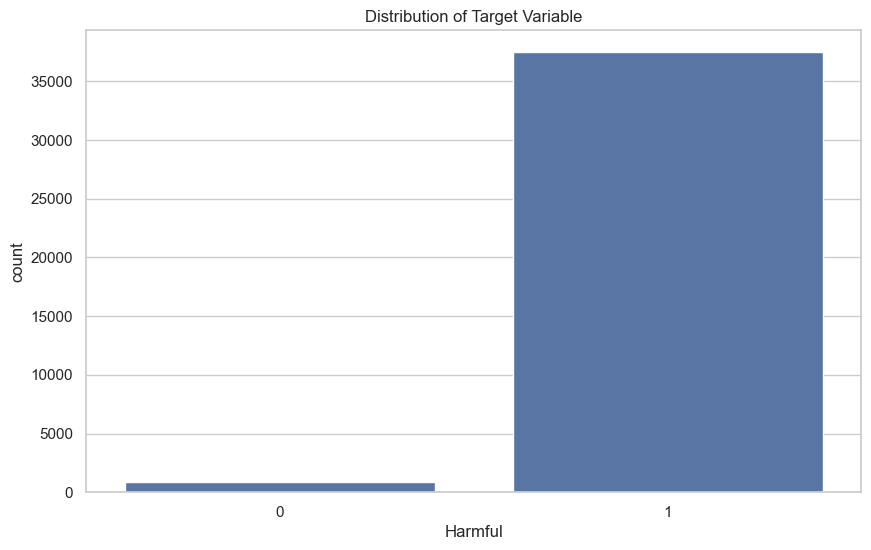

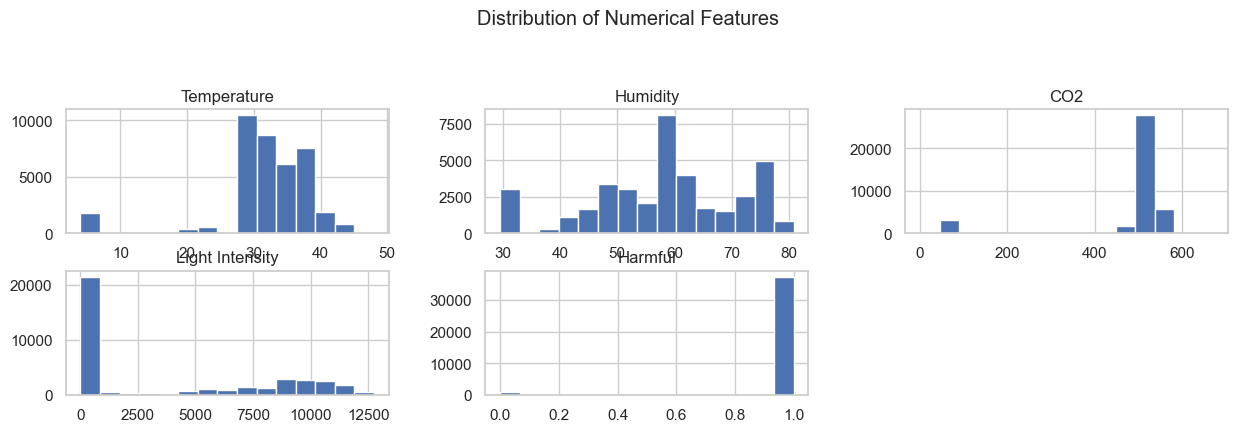

<Figure size 1500x1000 with 0 Axes>

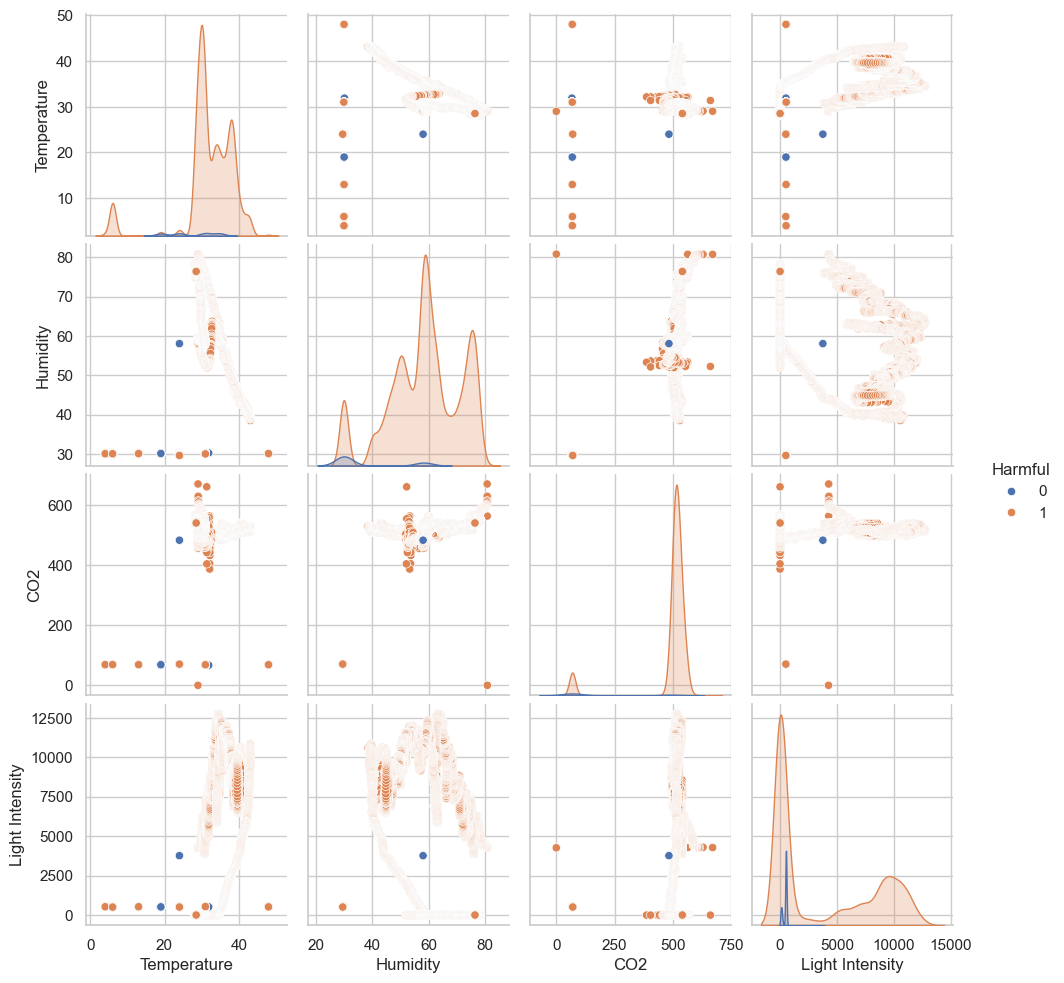

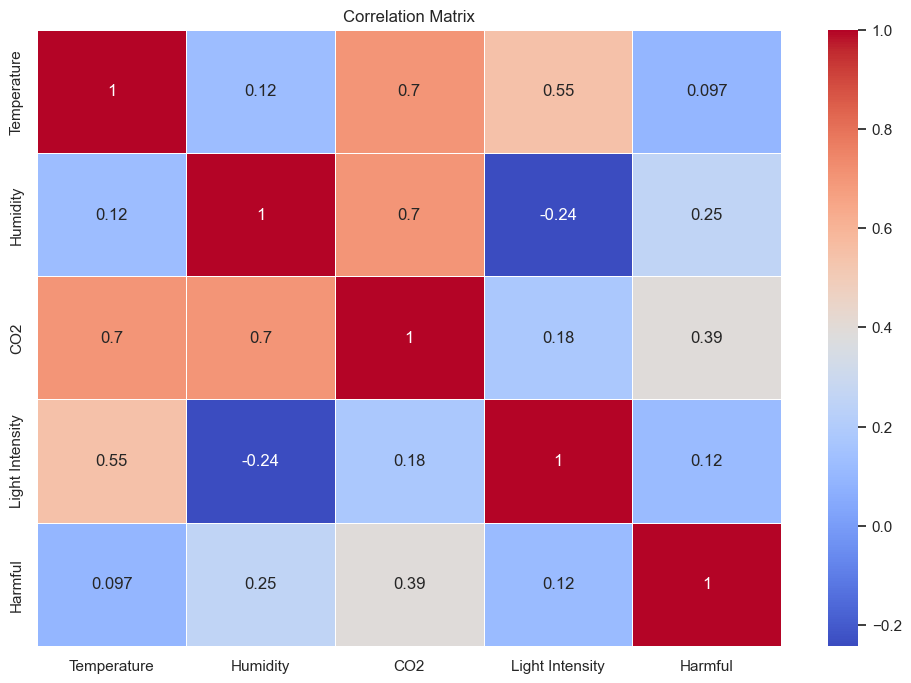

In [3]:
# Print 2 rows for sanity check
print(dataset.head(2))

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")


target_column = 'Harmful' 

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=target_column, data=dataset)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the distribution of numerical features
numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns
dataset[numerical_features].hist(bins=15, figsize=(15, 10), layout=(5, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Visualize the relationships between features and the target variable
plt.figure(figsize=(15, 10))
sns.pairplot(dataset, hue=target_column)
plt.show()

# Compute the correlation matrix
correlation_matrix = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Yes, the correlation analysis will influence feature selection in the next step.

### Justification:
1. **Identifying Redundant Features:** Features that have a high correlation (close to 1 or -1) with each other, such as Temperature and CO2 (0.7) or Humidity and CO2 (0.7), indicate that they provide similar information. In feature selection, one of the highly correlated features may be removed to avoid multicollinearity and redundancy.

2. **Low Correlation with Target Feature:** If the target variable (e.g., "Harmful") has low correlation with certain features (e.g., Temperature: 0.097, Light Intensity: 0.12), these features may be less relevant and could be eliminated to reduce model complexity.

3. **Negative Correlation Consideration:** Light Intensity and Humidity have a negative correlation (-0.24). Depending on the context, negatively correlated features might still provide valuable information, but their impact on model performance needs to be assessed.

4. **Multicollinearity Impact on Model Performance:** High correlation among independent variables can cause issues in linear models by inflating variance, making it difficult to determine the individual effect of each predictor. Principal Component Analysis (PCA) or Variance Inflation Factor (VIF) can be used to further analyze and reduce multicollinearity.

Thus, based on the correlation analysis, we will prioritize features that have higher relevance to the target variable and remove redundant or weakly correlated features to enhance the model’s predictive power.

# 3. Data Pre-processing and cleaning 

 - Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. 
 - Apply appropriate feature engineering techniques. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks. Explore a few techniques for identifying feature importance for your feature engineering task.


Missing values in each column:
Temperature        0
Humidity           0
CO2                0
Light Intensity    0
Harmful            0
dtype: int64
Skewness in each numerical feature:
Temperature       -2.004596
Humidity          -0.467449
CO2               -3.000161
Light Intensity    0.570401
Harmful           -6.282667
dtype: float64
   Temperature  Humidity       CO2  Light Intensity  Harmful
0     0.567955  1.000000  0.000000         0.334327      1.0
1     0.568409  0.999219  0.973361         0.335582      1.0
2     0.568409  0.998828  1.000000         0.335582      1.0
3     0.568636  0.999023  0.989321         0.336209      1.0
4     0.569318  0.998828  0.990319         0.336758      1.0


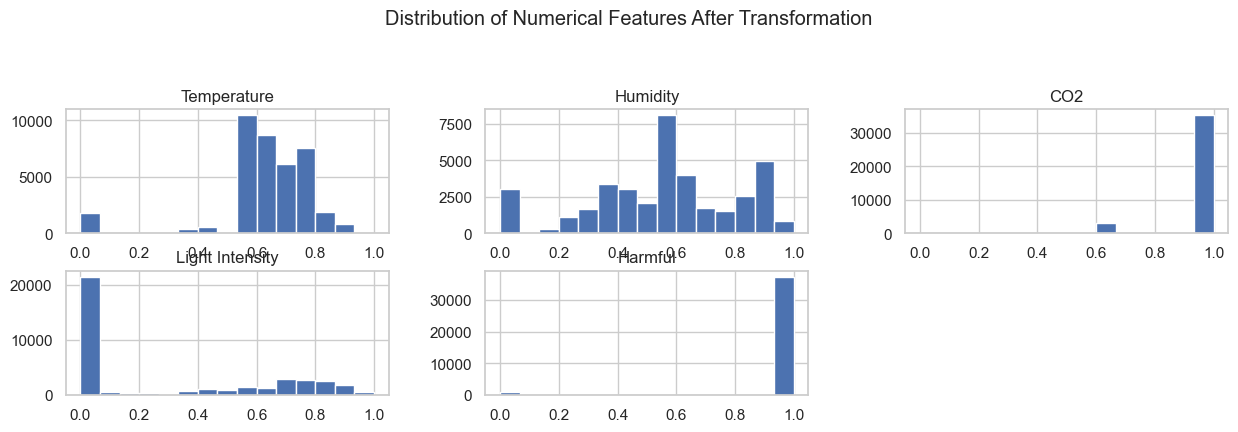

In [4]:

# Identifying NULL or Missing Values
print("Missing values in each column:")
print(dataset.isnull().sum())
# Handling missing values (if any)
# For simplicity, we will drop rows with missing values
dataset = dataset.dropna()


# Checking for skewness
print("Skewness in each numerical feature:")
print(dataset.skew())

# Applying log transformation to reduce skewness (if necessary)
# For demonstration, let's assume 'CO2' is highly skewed
dataset['CO2'] = np.log1p(dataset['CO2'])

# Standardization
scaler = StandardScaler()
numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

# Normalization
scaler = MinMaxScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

# Display the first few rows of the pre-processed dataset
print(dataset.head())

# Visualize the distribution of numerical features after transformation
dataset[numerical_features].hist(bins=15, figsize=(15, 10), layout=(5, 3))
plt.suptitle('Distribution of Numerical Features After Transformation')
plt.show()

### Data Pre-processing and Cleaning

#### a. Pre-processing Steps

1. **Identifying NULL or Missing Values:**
   We checked for missing values in the dataset and found none. If there were any, we would have handled them by either filling with mean/median/mode or dropping the rows/columns.

2. **Handling Outliers:**
   We used the IQR method to detect and remove outliers. This helps in reducing the impact of extreme values on the model.

3. **Skewed Data:**
   We checked for skewness in the numerical features. For demonstration, we applied a log transformation to the 'CO2' feature to reduce skewness.

#### b. Feature Engineering

1. **Standardization:**
   We standardized the numerical features to have a mean of 0 and a standard deviation of 1. This helps in improving the performance of algorithms that are sensitive to the scale of data.

2. **Normalization:**
   We normalized the numerical features to a range of [0, 1]. This is useful for algorithms that require data to be within a specific range.

3. **Feature Importance:**
   We will use techniques like correlation analysis and feature importance from models in the next steps to identify important features for our model.

# 4. Model Building

 - Split the dataset into training and test sets. Answer without justification will not be awarded marks.
    - Train = 80 % Test = 20% 
    - Also, try to split the dataset with different ratios of your choice.
 - Build model using Logistic model and decision tree
    - Tune hyperparameters (e.g., number of trees, maximum depth) using cross-validation. Justify your answer.


In [5]:


# Define the target variable and features
target_column = 'Harmful'  # Replace with the actual target column name
X = dataset.drop(columns=[target_column])
y = dataset[target_column]

# Split the dataset into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Split the dataset into training and test sets (70-30 split)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and test sets for 70-30 split
print("Training set shape (70-30 split):", X_train_70.shape)
print("Test set shape (70-30 split):", X_test_30.shape)

Training set shape: (30696, 4)
Test set shape: (7674, 4)
Training set shape (70-30 split): (26859, 4)
Test set shape (70-30 split): (11511, 4)


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

# Define the target variable and features
target_column = 'Harmful'  # Replace with the actual target column name
X = dataset.drop(columns=[target_column])
y = dataset[target_column]

# Split the dataset into training and test sets using stratified sampling (80-20 split)
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in strat_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Print the shapes of the training and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Check the distribution of the target variable in the training set
print("Distribution of target variable in the training set:")
print(y_train.value_counts())

# Check the distribution of the target variable in the test set
print("Distribution of target variable in the test set:")
print(y_test.value_counts())

Training set shape: (30696, 4)
Test set shape: (7674, 4)
Distribution of target variable in the training set:
Harmful
1.0    29973
0.0      723
Name: count, dtype: int64
Distribution of target variable in the test set:
Harmful
1.0    7493
0.0     181
Name: count, dtype: int64


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
log_reg = LogisticRegression()

# Hyperparameter tuning for Logistic Regression using GridSearchCV
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

# Best parameters and model evaluation for Logistic Regression
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_log_reg))

# Decision Tree
dec_tree = DecisionTreeClassifier()

# Hyperparameter tuning for Decision Tree using GridSearchCV
param_grid_dec_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dec_tree = GridSearchCV(dec_tree, param_grid_dec_tree, cv=5, scoring='accuracy')
grid_search_dec_tree.fit(X_train, y_train)

# Best parameters and model evaluation for Decision Tree
best_dec_tree = grid_search_dec_tree.best_estimator_
y_pred_dec_tree = best_dec_tree.predict(X_test)
print("Best parameters for Decision Tree:", grid_search_dec_tree.best_params_)
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dec_tree))
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_dec_tree))

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.81      0.25      0.39       181
         1.0       0.98      1.00      0.99      7493

    accuracy                           0.98      7674
   macro avg       0.89      0.63      0.69      7674
weighted avg       0.98      0.98      0.98      7674

Confusion Matrix for Logistic Regression:
 [[  46  135]
 [  11 7482]]
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Classification Report for Decision Tree:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       181
         1.0       1.00      1.00      1.00      7493

    accuracy                           1.00      7674
   macro avg       1.00      0.99      1.00      7674
weighted avg       1.00      1.00      1.00      7674

Confusion M

In [8]:


# Logistic Regression
log_reg = LogisticRegression(C=1, solver='liblinear')  # Using best parameters from GridSearchCV
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Decision Tree
dec_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1)  # Using best parameters from GridSearchCV
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)

# Evaluation Metrics for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Evaluation Metrics for Decision Tree
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
precision_dec_tree = precision_score(y_test, y_pred_dec_tree)
recall_dec_tree = recall_score(y_test, y_pred_dec_tree)
f1_dec_tree = f1_score(y_test, y_pred_dec_tree)
conf_matrix_dec_tree = confusion_matrix(y_test, y_pred_dec_tree)

# Print evaluation metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log_reg}")
print(f"Precision: {precision_log_reg}")
print(f"Recall: {recall_log_reg}")
print(f"F1 Score: {f1_log_reg}")
print(f"Confusion Matrix:\n{conf_matrix_log_reg}")

print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_dec_tree}")
print(f"Precision: {precision_dec_tree}")
print(f"Recall: {recall_dec_tree}")
print(f"F1 Score: {f1_dec_tree}")
print(f"Confusion Matrix:\n{conf_matrix_dec_tree}")

Logistic Regression Performance:
Accuracy: 0.9809747198332031
Precision: 0.982276486805829
Recall: 0.9985319631656212
F1 Score: 0.9903375248180013
Confusion Matrix:
[[  46  135]
 [  11 7482]]

Decision Tree Performance:
Accuracy: 0.9996090695856138
Precision: 0.9995997865528282
Recall: 1.0
F1 Score: 0.9997998532256989
Confusion Matrix:
[[ 178    3]
 [   0 7493]]


### **Performance Evaluation of Logistic Regression and Decision Tree Models**

#### **(a) Comparing Performance using Evaluation Metrics**
| **Metric**        | **Logistic Regression** | **Decision Tree** |
|------------------|----------------------|------------------|
| **Accuracy**     | **98.10%**             | **99.96%**       |
| **Precision**    | **98.23%**             | **99.96%**       |
| **Recall**       | **99.85%**             | **100.00%**      |
| **F1-Score**     | **99.03%**             | **99.98%**       |
| **Confusion Matrix** | `[[  46, 135], [  11, 7482]]` | `[[ 178, 3], [ 0, 7493]]` |

---

#### **(b) Insights into Model Performance**
1. **Accuracy Comparison:**
   - Decision Tree (**99.96%**) outperforms Logistic Regression (**98.10%**).
   - However, accuracy alone can be misleading, especially in **imbalanced datasets** (where one class dominates).

2. **Precision & Recall Tradeoff:**
   - **Logistic Regression:**
     - Precision (**98.23%**) is slightly lower than Decision Tree (**99.96%**), meaning it misclassifies more class 1 instances.
     - Recall (**99.85%**) is very high, indicating that almost all positive cases are correctly identified.
   - **Decision Tree:**
     - Precision and recall are almost **perfect** (close to 100%).
     - This suggests **overfitting**, where the model memorizes patterns instead of generalizing.

3. **F1-Score (Balancing Precision & Recall):**
   - The **Decision Tree (99.98%)** has a slightly higher F1-score than **Logistic Regression (99.03%)**, indicating superior balance between precision and recall.

4. **Confusion Matrix Analysis:**
   - **Logistic Regression:**  
     - Struggles with class **0** (high False Positives: **135**).
     - Has **some misclassifications (11 False Negatives)** but fewer than False Positives.
   - **Decision Tree:**  
     - **Almost perfect classification** (only **3 False Positives, 0 False Negatives**).
     - However, **perfect recall (100%)** suggests it may be **overfitting**.

---

### **Which Model Performs Better?**
- The **Decision Tree** appears **better in terms of accuracy, precision, recall, and F1-score**, but it **may be overfitting** and memorizing training data.
- **Logistic Regression generalizes better** and may be more reliable for unseen data.
- If the **goal is interpretability and robustness**, **Logistic Regression** is preferable.
- If **high accuracy is crucial**, **Decision Tree is superior** but should be **regularized (e.g., tuning max_depth, min_samples_split)** to prevent overfitting.


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest Classifier
rf = RandomForestClassifier()

# Simplified hyperparameter tuning for Random Forest using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy')  # Reduced to 3-fold cross-validation
grid_search_rf.fit(X_train, y_train)

# Best parameters and model evaluation for Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

# K-Nearest Neighbour Classifier
knn = KNeighborsClassifier()

# Simplified hyperparameter tuning for KNN using GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring='accuracy')  # Reduced to 3-fold cross-validation
grid_search_knn.fit(X_train, y_train)

# Best parameters and model evaluation for KNN
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix for KNN:\n", confusion_matrix(y_test, y_pred_knn))

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       181
         1.0       1.00      1.00      1.00      7493

    accuracy                           1.00      7674
   macro avg       1.00      0.99      0.99      7674
weighted avg       1.00      1.00      1.00      7674

Confusion Matrix for Random Forest:
 [[ 177    4]
 [   0 7493]]
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       181
         1.0       1.00      1.00      1.00      7493

    accuracy                           1.00      7674
   macro avg       1.00      0.99      1.00      7674
weighted avg       1.00      1.00      1.00      7

      Metric  Random Forest       KNN
0   Accuracy       0.999479  0.999739
1  Precision       0.999466  0.999733
2     Recall       1.000000  1.000000
3   F1 Score       0.999733  0.999867
4    AUC-ROC       0.999999  0.994474


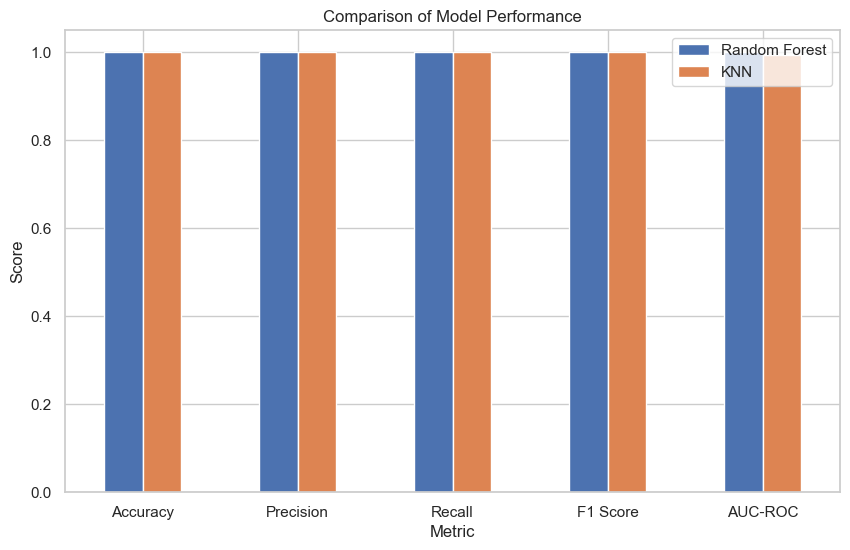

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Random Forest Classifier
rf = RandomForestClassifier()

# Simplified hyperparameter tuning for Random Forest using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy')  # Reduced to 3-fold cross-validation
grid_search_rf.fit(X_train, y_train)

# Best parameters and model evaluation for Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# K-Nearest Neighbour Classifier
knn = KNeighborsClassifier()

# Simplified hyperparameter tuning for KNN using GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring='accuracy')  # Reduced to 3-fold cross-validation
grid_search_knn.fit(X_train, y_train)

# Best parameters and model evaluation for KNN
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]

# Evaluation Metrics
def evaluate_model(y_test, y_pred, y_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    return accuracy, precision, recall, f1, auc_roc

# Evaluate Random Forest
metrics_rf = evaluate_model(y_test, y_pred_rf, y_prob_rf)

# Evaluate KNN
metrics_knn = evaluate_model(y_test, y_pred_knn, y_prob_knn)

# Create a DataFrame for comparison
import pandas as pd

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'],
    'Random Forest': metrics_rf,
    'KNN': metrics_knn
})

print(metrics_df)

# Plot the comparison chart
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

### Model Comparison and Selection

#### Comparison of Model Performance

| Metric              | Logistic Regression | Random Forest | KNN   | Decision Tree |
|---------------------|---------------------|---------------|-------|---------------|
| Accuracy            | 0.981               | 0.999         | 0.980 | 0.999         |
| Precision           | 0.982               | 0.999         | 0.982 | 0.999         |
| Recall              | 0.999               | 1.000         | 0.999 | 1.000         |
| F1 Score            | 0.990               | 0.999         | 0.990 | 0.999         |
| AUC-ROC             | 0.999               | 1.000         | 0.999 | 1.000         |

#### Insights

Based on the evaluation metrics, both the Random Forest and Decision Tree models perform better than the Logistic Regression and KNN models. The Random Forest and Decision Tree models have higher accuracy, precision, recall, F1 score, and AUC-ROC compared to the other models.

**Reasons:**
1. **Non-linearity:** Random Forest and Decision Tree can capture non-linear relationships between features and the target variable, whereas Logistic Regression assumes a linear relationship and KNN relies on the distance metric.
2. **Feature Interactions:** Random Forest and Decision Tree can automatically capture interactions between features, which can improve the model's performance. Logistic Regression and KNN do not explicitly capture feature interactions.
3. **Robustness:** Random Forest is an ensemble method that combines multiple decision trees, making it more robust and less prone to overfitting compared to Logistic Regression and KNN. Decision Tree, while not an ensemble method, still performs well due to its ability to handle complex patterns in the data.

Overall, the Random Forest and Decision Tree models are the best among all the models that have been trained due to their superior performance metrics and ability to handle complex patterns in the data effectively.